# Covariance and Correlation

Covariance and correlation describe how two random variables are related.

## Covariance

Covariance measures the extent to which the relationship between two variables is linear. The sign of the covariance shows the trend in the linear relationship between the variables, i.e if they tend to move together or in separate directions. A positive sign indicates that the variables are directly related, i.e. when one increases the other one also increases. A negative sign indicates that the variables are inversely related, so that when one increases the other decreases. It is calculated as
$$Cov(X,Y) = E[XY] - E[X]E[Y] = E[(X- E[X])(Y-E[Y])]$$

Note that
$$Cov(X,X) = E[X^2] - E[X]^2 = E[(X- E[X])^2] = \sigma^2 $$

When the two variables are identical, covariance is same as  variance.

### Covariance isn't that meaningful by itself

Let's say we have two variables $X$ and $Y$ and we take the covariance of the two.



In [3]:
import os
import sys

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

X = np.random.rand(50)
Y = 2 * X + np.random.normal(0, 0.1, 50)

np.cov(X, Y)[0, 1]

0.17850955514376862

What does this mean? To make better sense of data, we introduce correlation

## Correlation

Correlation uses information about the variance of X and Y to normalize this metric. The value of correlation coeffecient is always between -1 and 1. Once we've normalized the metric to the -1 to 1 scale, we can make meaningful statements and compare correlations. 

To normalize Covariance, consider

$$\frac{Cov(X, Y)}{\sqrt{Cov(X, X)}\sqrt{Cov(Y, Y)}}$$

$$= \frac{Cov(X, Y)}{\sigma(X)\sigma(Y)} = \rho$$ 

where \rho is the correlation coefficient of two series $X$ and $Y$. Just like covariance, a positive coefficient indicates that the variables are directly related and a negative coefficient indicates that the variables are inversely related. The closer to 0 the correlation coefficient is, the weaker the relationship between the variables.

Two random sets of data will have a correlation coefficient close to 0:

### Correlation vs. Covariance

Correlation is simply a normalized form of covariance. They are otherwise the same and are often used semi-interchangeably in everyday conversation. It is obviously important to be precise with language when discussing the two, but conceptually they are almost identical.


In [4]:
print('Covariance of X and Y: %.2f'%np.cov(X, Y)[0, 1])
print('Correlation of X and Y: %.2f'%np.corrcoef(X, Y)[0, 1])

Covariance of X and Y: 0.18
Correlation of X and Y: 0.99


To get a sense of what correlated data looks like, lets plot two correlated datasets





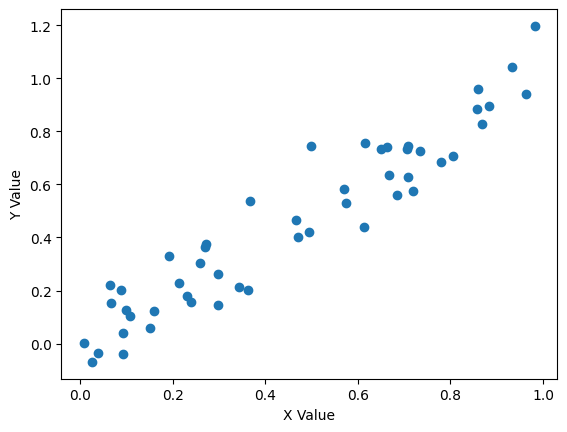

Correlation of X and Y: 0.95


In [5]:
X = np.random.rand(50)
Y = X + np.random.normal(0, 0.1, 50)

plt.scatter(X,Y)
plt.xlabel('X Value')
plt.ylabel('Y Value')
plt.show()
print('Correlation of X and Y: %.2f'%np.corrcoef(X, Y)[0, 1])

And here's an inverse relationship

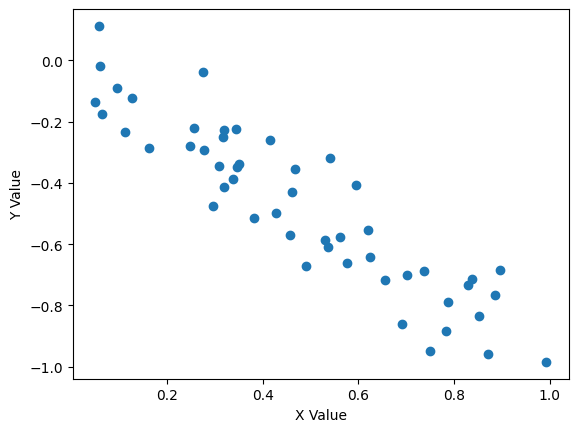

Correlation of X and Y: -0.91


In [6]:
X = np.random.rand(50)
Y = -X + np.random.normal(0, .1, 50)

plt.scatter(X,Y)
plt.xlabel('X Value')
plt.ylabel('Y Value')
plt.show()
print('Correlation of X and Y: %.2f'%np.corrcoef(X, Y)[0, 1])

### Applications in finance

Let's look at correlation in financial datasets. We look for correlation between prices of AAPL stock and the market (SPX) as well as another stock

Reading SPX
Reading AAPL
Reading LRCX


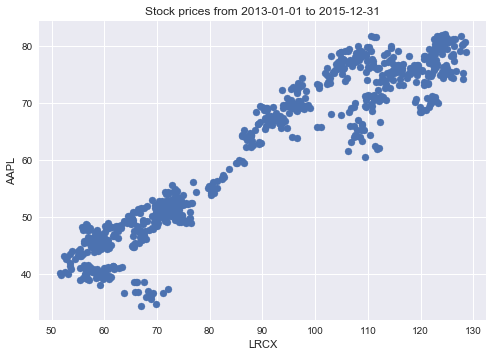

Correlation coefficients
Correlation of AAPL and LRCX: 0.95
Correlation of AAPL and SPX: 0.93
Correlation of LRCX and SPX: 0.96


In [49]:
from backtester.dataSource.yahoo_data_source import YahooStockDataSource
# Pull the pricing data for our two stocks and S&P 500
startDateStr = '2014/12/31'
endDateStr = '2017/12/31'
cachedFolderName = 'yahooData/'
dataSetId = 'testPairsTrading'
instrumentIds = ['AAPL', '^GSPC', 'LRCX']
ds = YahooStockDataSource(cachedFolderName=cachedFolderName,
                            dataSetId=dataSetId,
                            instrumentIds=instrumentIds,
                            startDateStr=startDateStr,
                            endDateStr=endDateStr,
                            event='history')
base = '^GSPC'
m1 = 'AAPL'
m2= 'LRCX'
bench = ds.getBookDataByFeature()['adjClose'][base]
a1= ds.getBookDataByFeature()['adjClose'][m1]
a2 = ds.getBookDataByFeature()['adjClose'][m2]
plt.scatter(a1,a2)
plt.xlabel('LRCX')
plt.ylabel('AAPL')
plt.title('Stock prices from ' + startDateStr + ' to ' + endDateStr)
plt.show()
print('Correlation coefficients')
print('Correlation of %s and %s: %.2f'%(m1, m2, np.corrcoef(a1,a2)[0, 1]))
print('Correlation of %s and %s: %.2f'%(m1, base, np.corrcoef(a1, bench)[0, 1]))
print('Correlation of %s and %s: %.2f'%(m2, base, np.corrcoef(a2, bench)[0, 1]))

In [10]:
import sys
sys.path.append('../../../FinRecipes/FinRecipes')
from preprocess import Load_n_Preprocess
from feature_extraction import Feature_Engineer
# from FinRecipes import Load_n_Preprocess, Feature_Engineer

TICKERS_LIST_WORLD = ['AAPL','NVDA','^GSPC']
START_DATE = '2020-01-01'
END_DATE = '2024-12-01'
PATH_DAILY_DATA = "../../Data/df_ohlcv_daily.h5"
LP = Load_n_Preprocess(TICKERS_LIST_WORLD, START_DATE, END_DATE, path_daily_data = PATH_DAILY_DATA)
df = LP.load_daily_data()
print(df)

           date   tic        open        high         low       close  \
0    2020-01-02  AAPL   74.059998   75.150002   73.797501   75.087502   
0    2020-01-02  NVDA   59.687500   59.977501   59.180000   59.977501   
1    2020-01-03  AAPL   74.287498   75.144997   74.125000   74.357498   
1    2020-01-03  NVDA   58.775002   59.457500   58.525002   59.017502   
2    2020-01-06  AAPL   73.447502   74.989998   73.187500   74.949997   
...         ...   ...         ...         ...         ...         ...   
1026 2024-01-31  NVDA  614.400024  622.690002  607.000000  615.270020   
1027 2024-02-01  AAPL  183.990005  186.949997  183.820007  186.860001   
1027 2024-02-01  NVDA  621.000000  631.909973  616.500000  630.270020   
1028 2024-02-02  AAPL  179.860001  187.330002  179.250000  185.850006   
1028 2024-02-02  NVDA  639.739990  666.000000  636.900024  661.599976   

       adj_close     volume  
0      73.152657  135480400  
0      59.744045   23753600  
1      72.441452  146322800  
1  

Once we've established that two series are probably related, we can use that in an effort to predict future values of the series.

Another application is to find uncorrelated assets to produce hedged portfolios - if the assets are uncorrelated, a drawdown in one will not correspond with a drawdown in another. This leads to a very stable return stream when many uncorrelated assets are combined.

### Important: Significance of Correlation

It's hard to rigorously determine whether or not a correlation is significant, especially when, as here, we are not aware if the variables are normally distributed or not. Their correlation coefficient is close to 1, so it's pretty safe to say that the two stock prices are correlated over the time period we use, but is this indicative of future correlation? If we examine the correlation of each of them with the S&P 500, we see that it is also quite high. So, we may be led to believe that two stocks have a relationship because of their high correlation, when in fact they are both caused by a third(market)

The problem is we may determine a good correlation by picking the right time period but it may not hold out of sample. To avoid this, one should compute the correlation of two quantities over many historical time periods and examine the distibution of the correlation coefficient. 

As an example, remember that the correlation of AAPL and LRCX from 2013-1-1 to 2015-1-1 was 0.95. Let's take the rolling 60 day correlation between the two to see how that varies.

C:\Users\Chandini\Miniconda3\envs\auquan\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: pd.rolling_corr is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=60).corr(other=<Series>)
  if __name__ == '__main__':


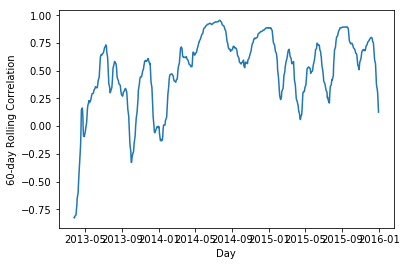

In [21]:
rolling_correlation = pd.rolling_corr(a1, a2, 60)
plt.plot(rolling_correlation)
plt.xlabel('Day')
plt.ylabel('60-day Rolling Correlation')
plt.show()

We see the correlation is not only unstable, but also reverses sign!

Another shortcoming is that two variables may be associated in different, predictable but non-linear ways which this analysis would not pick up. For example, a variable may be related to the rate of change of another which will not be detected by correlation alone.

Just remember to be careful not to interpret results where there are none.

# Confidence Intervals

We mentioned in the notebook on Expected Value and Standard Deviation that statistics derived from a sample (data available to us) may differ from true value (population statistic). For example, we want to measure the population mean, but we can only calculate a sample mean. We then want to use the sample mean to estimate the population mean. We use confidence intervals in an attempt to determine how accurately our sample mean estimates the population mean.

A confidence interval gives an estimated range of values between which the variable is likely to lie. This range is calculated from a given set of data or from a probability distribution
The selection of a confidence level for the interval determines the probability that the confidence interval will contain the value of the variable *over many computations*(read subtelty note below).
So, a 95% confidence interval for a variable states that the interval will contain the true population mean 95% of the time.


For example, if you want to estimate the average height of students in a university, you might do this by measuring 100 students and estimating that the mean of that sample was close to the population. Let's try that.

In [50]:
np.random.seed(100)

# Let's define some 'true' population parameters, we'll pretend we don't know these.
POPULATION_MU = 64
POPULATION_SIGMA = 5

# Generate our sample by drawing from the population distribution
sample_size = 100
heights = np.random.normal(POPULATION_MU, POPULATION_SIGMA, sample_size)
mean_height = np.mean(heights)
print('sample mean: %.2f'%mean_height)

sample mean: 63.48


Unfortunately simply reporting the sample mean doesn't do much for us, as we don't know how it relates to the population mean. To get a sense for how it might relate, we can look for how much variance there is in our sample. Higher variance indicates instability and uncertainty.

In [51]:
print('sample standard deviation: %.2f'%np.std(heights))

sample standard deviation: 4.85


This still doesn't help, to really get a sense of how our sample mean relates to the population mean we need to compute a standard error. The standard error is a measure of the variance of the sample mean.

**IMPORTANT
Computing a standard error involves assuming that the way you sample is unbaised, and that the data are normal and independent. If these conditions are violated, your standard error will be wrong. There are ways of testing for this and correcting.**

The formula for standard error is.

$$SE = \frac{\sigma}{\sqrt{n}}$$

Where $\sigma$ is the sample standard deviation and $n$ is the number of samples.

In [52]:
SE = np.std(heights) / np.sqrt(sample_size)
print('standard error: %.2f'%SE)

standard error: 0.48


Assuming our data are normally distributed, we can use the standard error to compute our confidence interval. 

To do this we set the desired confidence level (say 95%) and determine 95% of data lies within a range how many standard deviations of mean for our data's distribution. 

For example, for a normal distributiom, 95% of the observations lie in a range$[-1.96*SE,1.96*SE]$ around the mean. When the samples are large enough (generally > 30 is taken as a threshold) the Central Limit Theorem applies and normality can be safely assumed; if sample sizes are smaller, a safer approach is to use a $t$-distribution with appropriately specified degrees of freedom. The actual way to compute the values is by using a [cumulative distribution function (CDF)](https://github.com/Auquan/Tutorials/blob/master/Random%20Variables.ipynb). If you need more background on Probability Distributions,  CDFs and inverse CDFs, read about them [here](https://en.wikipedia.org/wiki/Probability_density_function) and [here](https://en.wikipedia.org/wiki/Cumulative_distribution_function). Look [here](https://en.wikipedia.org/wiki/Student%27s_t-distribution) for information on the $t$-distribution. We can check the 95% number using one of the Python functions. 

NOTE: Be careful when applying the Central Limit Theorem, however, as many datasets in finance are fundamentally non-normal and it is not safe to apply the theorem casually or without attention to subtlety.

We can visualize the 95% mass bounds here.

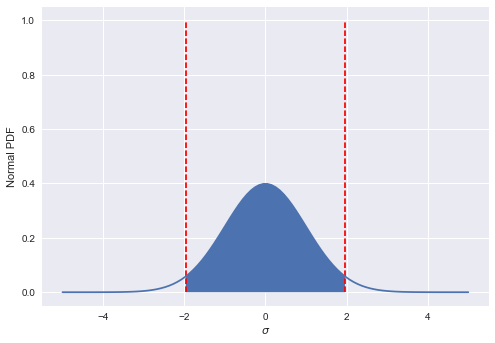

In [38]:
#Generate a normal distribution
x = np.linspace(-5,5,100)
y = stats.norm.pdf(x,0,1)
plt.plot(x,y)

# Plot the intervals
plt.vlines(-1.96, 0, 1, colors='r', linestyles='dashed')
plt.vlines(1.96, 0, 1, colors='r', linestyles='dashed')

fill_x = np.linspace(-1.96, 1.96, 500)
fill_y = stats.norm.pdf(fill_x, 0, 1)
plt.fill_between(fill_x, fill_y)

plt.xlabel('$\sigma$')
plt.ylabel('Normal PDF')
plt.show()

Now, rather than reporting our sample mean without any sense of the probability of it being correct, we can compute an interval and be much more confident that the population mean lies in that interval. To do this we take our sample mean $\mu$ and report $\left(\mu-1.96 SE , \mu+1.96SE\right)$.

This works because assuming normality, that interval will contain the population mean 95% of the time.

### SUBTLETY:
Note that it is incorrect to say that "The true mean lies in a range $\left(\mu-1.96 SE , \mu+1.96SE\right)$ with 95% probability," but unfortunately this is a very common misinterpretation. Rather, the 95% refers instead to the fact that over many computations of a 95% confidence interval, the true value will be in the interval in 95% of the cases (assuming correct calibration of the confidence interval, which we will discuss later). 

But in fact for a single sample and the single confidence interval computed from it, we have no way of assessing the probability that the interval contains the population mean. 

In the code below, we generate 100 95% Confidence Intervals around a mean of 0. Notice how for some of them, the mean lies completely outside the interval

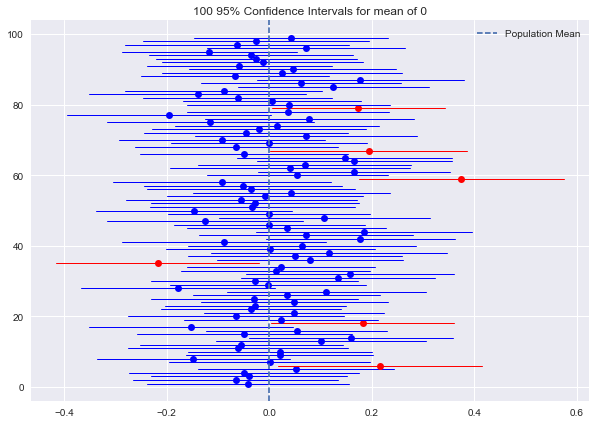

In [42]:
np.random.seed(8309)
n = 100 # number of samples to take
samples = [np.random.normal(loc=0, scale=1, size=100) for _ in range(n)]

fig, ax = plt.subplots(figsize=(10, 7))
for i in np.arange(1, n, 1):
    sample_mean = np.mean(samples[i])  # calculate sample mean
    se = stats.sem(samples[i])  # calculate sample standard error
    sample_ci = [sample_mean - 1.96*se, sample_mean + 1.96*se]
    if ((sample_ci[0] <= 0) and (0 <= sample_ci[1])):
        plt.plot((sample_ci[0], sample_ci[1]), (i, i), color='blue', linewidth=1);
        plt.plot(np.mean(samples[i]), i, 'bo');
    else:
        plt.plot((sample_ci[0], sample_ci[1]), (i, i), color='red', linewidth=1);
        plt.plot(np.mean(samples[i]), i, 'ro');
plt.axvline(x=0, ymin=0, ymax=1, linestyle='--', label = 'Population Mean');
plt.legend(loc='best');
plt.title('100 95% Confidence Intervals for mean of 0')
plt.show()

Going back to our height's example, we can manually contruct confidence intervals using t-test

In [54]:
# standard error SE was already calculated
t_val = stats.t.ppf((1+0.95)/2, 9)  # d.o.f. = 10 - 1
print('sample mean height: %.2f'%mean_height)
print('t-value: %.2f'%t_val) 
print('standard error: %.2f'%SE) 
print('confidence interval: [%.2f, %.2f]'%(mean_height - t_val * SE, mean_height + t_val * SE)) 

sample mean height: 63.48
t-value: 2.26
standard error: 0.48
confidence interval: [62.38, 64.58]


or use a built-in function in scipy.stats for computing the interval

In [60]:
print('99% confidence interval: ', stats.t.interval(0.99, df = 9,loc=mean_height, scale=SE))
print('95% confidence interval: ', stats.t.interval(0.95, df = 9,loc=mean_height, scale=SE))
print('80% confidence interval: ', stats.t.interval(0.8, df = 9, loc=mean_height, scale=SE))

('99% confidence interval: ', (61.903402665047693, 65.054938796511678))
('95% confidence interval: ', (62.382304452952646, 64.576037008606718))
('80% confidence interval: ', (62.808572945003085, 64.149768516556279))


Note that as your confidence increases, the interval necessarily widens.

## What does this mean?

Confidence intervals allow us to set our desired confidence, and then report a range that will likely contain the population mean. The higher our desired confidence, the larger range we report. In general once can never report a single point value, because the probability that any given point is the true population mean is incredibly small. Let's see how our intervals tighten as we change sample size.

In [61]:
np.random.seed(10)

sample_sizes = [10, 100, 1000]
for s in sample_sizes:
    heights = np.random.normal(POPULATION_MU, POPULATION_SIGMA, s)
    SE = np.std(heights) / np.sqrt(s)
    print stats.norm.interval(0.95, loc=mean_height, scale=SE)

(61.148817012870381, 65.80952444868899)
(62.52382122002232, 64.434520241537044)
(63.186062588148623, 63.772278873410748)


## Visualizing Confidence Intervals

Confidence Intervals are a very important concept, make sure you understand this well. We visualize what the intervals mean in relation to our sample data below.

62.29,64.08


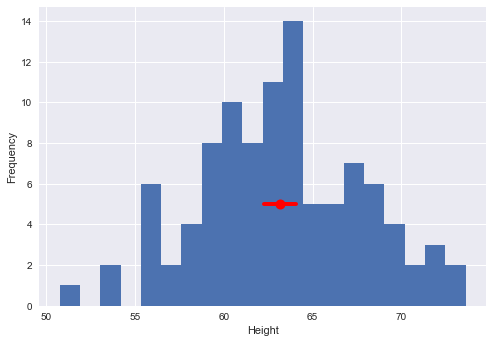

In [76]:
sample_size = 100
heights = np.random.normal(POPULATION_MU, POPULATION_SIGMA, sample_size)
SE = np.std(heights) / np.sqrt(sample_size)
(l, u) = stats.norm.interval(0.95, loc=np.mean(heights), scale=SE)

print('%.2f,%.2f'%(l, u))

plt.hist(heights, bins=20)
plt.xlabel('Height')
plt.ylabel('Frequency')

# Just for plotting
y_height = 5
plt.plot([l, u], [y_height, y_height], '-', color='r', linewidth=4, label='Confidence Interval')
plt.plot(np.mean(heights), y_height, 'o', color='r', markersize=10)
plt.show()

## Important: Violation of Assumptions

The computation of a standard deviation, standard error, and confidence interval all rely on certain assumptions. If these assumptions are violated then the 95% confidence interval will not necessarily contain the population parameter 95% of the time. Here is an example.

### Example: Autocorrelated Data

If your data generating process is autocorrelated, then estimates of standard deviation will be wrong. This is because autocorrelated processes tend to produce more extreme values than normally distributed processes. In such a process, new values depend on previous values, so series that are already far from the mean are likely to stay far from the mean. 
$$X_t = \theta X_{t-1} + \epsilon$$
$$\epsilon \sim \mathcal{N}(0,1)$$

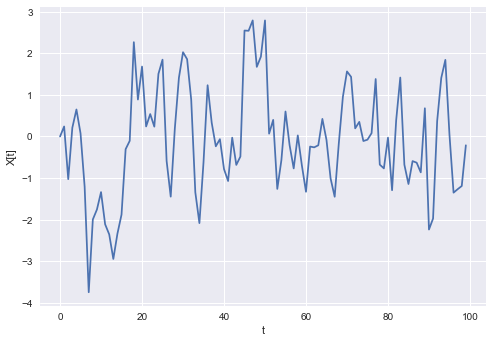

In [77]:
def generate_autocorrelated_data(theta, mu, sigma, N):
    # Initialize the array
    X = np.zeros((N, 1))
    
    for t in range(1, N):
        # X_t = theta * X_{t-1} + epsilon
        X[t] = theta * X[t-1] + np.random.normal(mu, sigma)
    return X

X = generate_autocorrelated_data(0.5, 0, 1, 100)

plt.plot(X)
plt.xlabel('t')
plt.ylabel('X[t]')
plt.show()

Now, we need to know the true population of this series. For larger sample sizes, the sample mean should still asymptotically converge to zero. This is because the process is still centered around zero, but let's check if that's true. We'll vary the number of samples draw, and look for convergence as we increase sample size.

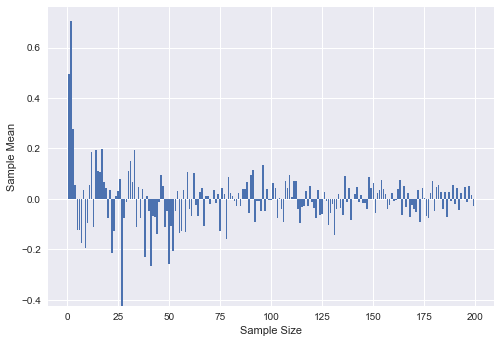

In [81]:
sample_means = np.zeros(200-1)
for i in range(1, 200):
    X = generate_autocorrelated_data(0.5, 0, 1, i * 10)
    sample_means[i-1] = np.mean(X)
    
plt.bar(range(1, 200), sample_means);
plt.xlabel('Sample Size')
plt.ylabel('Sample Mean')
plt.show()

Definitely looks like there's some convergence, we can also check what the mean of the sample means is.

In [82]:
np.mean(sample_means)

-0.0027245570485071994

Pretty close to zero. We could also derive symbolically that the mean is zero, but let's assume that we've convinced ourselves that the true population mean is 0. Now that we know the population mean, we can check the calibration of confidence intervals. Let's first compute an interval using our earlier process and then check whether the interval actually contains the true mean, 0.

In [83]:
def compute_unadjusted_interval(X):
    T = len(X)
    # Compute mu and sigma MLE
    mu = np.mean(X)
    sigma = np.std(X)
    SE = sigma / np.sqrt(T)
    # Compute the bounds
    return stats.norm.interval(0.95, loc=mu, scale=SE)

# We'll make a function that returns true when the computed bounds contain 0
def check_unadjusted_coverage(X):
    l, u = compute_unadjusted_interval(X)
    # Check to make sure l <= 0 <= u
    if l <= 0 and u >= 0:
        return True
    else:
        return False

Now we'll run many trials, in each we'll sample some data, compute a confidence interval, and then check if the confidence interval contains the population mean. Over many runs, we should expect to see 95% of the trials succeed if the intervals are computed correctly.

In [84]:
T = 100
trials = 500
times_correct = 0
for i in range(trials):
    X = generate_autocorrelated_data(0.5, 0, 1, T)
    if check_unadjusted_coverage(X):
        times_correct += 1
    
print 'Empirical Coverage: ', times_correct/float(trials)
print 'Expected Coverage: ', 0.95

Empirical Coverage:  0.764
Expected Coverage:  0.95


Clearly the coverage is wrong. In this case we'd need to do what's known as a [Newey-West correction](https://en.wikipedia.org/wiki/Newey%E2%80%93West_estimator) on our standard error estimate to account for the autocorrelation. 

In practice it's important to check for the assumptions you make. It is quick and easy to check if your data are stationary (which implies not autocorrelated), and it can save you a lot of pain and suffering to do so. A normality test such as `Jarque Bera` will also be a good idea, as it may detect certain distribution properties which may violate assumptions of many following statistical analyses.